In [1]:
import requests
import datetime
import pandas as pd


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [3]:
# Pretty print the JSON
import uuid
from IPython.display import display_javascript, display_html, display
import json

class RenderJSON(object):
    def __init__(self, json_data):
        if isinstance(json_data, dict):
            self.json_str = json.dumps(json_data)
        else:
            self.json_str = json_data
        self.uuid = str(uuid.uuid4())

    def _ipython_display_(self):
        display_html('<div id="{}" style="height: 600px; width:100%;"></div>'.format(self.uuid), raw=True)
        display_javascript("""
        require(["https://rawgit.com/caldwell/renderjson/master/renderjson.js"], function() {
        document.getElementById('%s').appendChild(renderjson(%s))
        });
        """ % (self.uuid, self.json_str), raw=True)

In [4]:
def price(symbol, comparison_symbols=['USD'], exchange=''):
    url = 'https://min-api.cryptocompare.com/data/price?fsym={}&tsyms={}'\
            .format(symbol.upper(), ','.join(comparison_symbols).upper())
    if exchange:
        url += '&e={}'.format(exchange)
    page = requests.get(url)
    data = page.json()
    return data

In [9]:
price('LTC', exchange='Coinbase')

{'USD': 84.06}

In [8]:
price('LTC', exchange='Bitfinex')

{'USD': 83.95}

In [10]:
price('NEO', ['BTC', 'ETH', 'USD'])

{'BTC': 0.004069, 'ETH': 0.07094, 'USD': 33.24}

In [11]:
def daily_price_historical(symbol, comparison_symbol, limit=1, aggregate=1, exchange='', allData='true'):
    url = 'https://min-api.cryptocompare.com/data/histoday?fsym={}&tsym={}&limit={}&aggregate={}&allData={}'\
            .format(symbol.upper(), comparison_symbol.upper(), limit, aggregate, allData)
    if exchange:
        url += '&e={}'.format(exchange)
    page = requests.get(url)
    data = page.json()['Data']
    df = pd.DataFrame(data)
    df['timestamp'] = [datetime.datetime.fromtimestamp(d) for d in df.time]
    return df

In [12]:
df = daily_price_historical('BTC', 'USD')
print('Max length = %s' % len(df))
print('Max time = %s' % (df.timestamp.max() - df.timestamp.min()))
df.head()

Max length = 2934
Max time = 2933 days 00:00:00


,close,high,low,open,time,volumefrom,volumeto,timestamp
0,0.04951,0.04951,0.04951,0.04951,1279324800,20.00,0.9902,2010-07-17 03:00:00
1,0.08584,0.08585,0.05941,0.04951,1279411200,75.01,5.0900,2010-07-18 03:00:00
2,0.08080,0.09307,0.07723,0.08584,1279497600,574.00,49.6600,2010-07-19 03:00:00
3,0.07474,0.08181,0.07426,0.08080,1279584000,262.00,20.5900,2010-07-20 03:00:00
4,0.07921,0.07921,0.06634,0.07474,1279670400,575.00,42.2600,2010-07-21 03:00:00


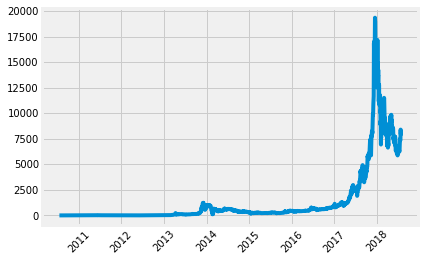

In [13]:
plt.plot(df.timestamp, df.close)
plt.xticks(rotation=45)
plt.show()

In [14]:
def hourly_price_historical(symbol, comparison_symbol, limit, aggregate, exchange=''):
    url = 'https://min-api.cryptocompare.com/data/histohour?fsym={}&tsym={}&limit={}&aggregate={}'\
            .format(symbol.upper(), comparison_symbol.upper(), limit, aggregate)
    if exchange:
        url += '&e={}'.format(exchange)
    page = requests.get(url)
    data = page.json()['Data']
    df = pd.DataFrame(data)
    df['timestamp'] = [datetime.datetime.fromtimestamp(d) for d in df.time]
    return df

Max length = 26063
Max time = 1085 days 22:00:00


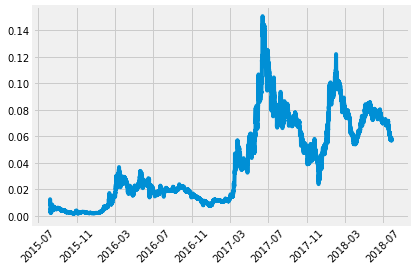

,close,high,low,open,time,volumefrom,volumeto,timestamp
26058,0.05728,0.05728,0.05708,0.05719,1532754000,18846.89,1077.67,2018-07-28 08:00:00
26059,0.05741,0.05745,0.05728,0.05729,1532757600,24091.22,1383.15,2018-07-28 09:00:00
26060,0.05734,0.05746,0.05730,0.05741,1532761200,40955.67,2350.16,2018-07-28 10:00:00
26061,0.05732,0.05741,0.05728,0.05734,1532764800,33408.94,1916.31,2018-07-28 11:00:00
26062,0.05736,0.05736,0.05730,0.05732,1532768400,4859.95,278.60,2018-07-28 12:00:00


In [28]:
time_delta = 1 # Bar width in hours
df = hourly_price_historical('ETH', 'BTC', 99999, time_delta)
print('Max length = %s' % len(df))
print('Max time = %s' % (df.timestamp.max() - df.timestamp.min()))

plt.plot(df.timestamp, df.close)
plt.xticks(rotation=45)
plt.show()
df.tail()

Max length = 84
Max time = 83 days 00:00:00


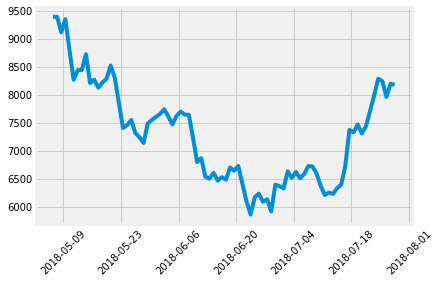

In [31]:
time_delta = 24 # Bar width in hours
df = hourly_price_historical('BTC', 'USD', 99999, time_delta)
print('Max length = %s' % len(df))
print('Max time = %s' % (df.timestamp.max() - df.timestamp.min()))

plt.plot(df.timestamp, df.close)
plt.xticks(rotation=45)
plt.show()

In [17]:
def minute_price_historical(symbol, comparison_symbol, limit, aggregate, exchange=''):
    url = 'https://min-api.cryptocompare.com/data/histominute?fsym={}&tsym={}&limit={}&aggregate={}'\
            .format(symbol.upper(), comparison_symbol.upper(), limit, aggregate)
    if exchange:
        url += '&e={}'.format(exchange)
    page = requests.get(url)
    data = page.json()['Data']
    df = pd.DataFrame(data)
    df['timestamp'] = [datetime.datetime.fromtimestamp(d) for d in df.time]
    return df

Max length = 2001
Max time = 1 days 09:20:00


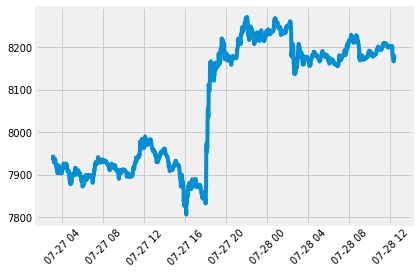

In [29]:
time_delta = 1 # Bar width in minutes
df = minute_price_historical('BTC', 'USD', 9999, time_delta)
print('Max length = %s' % len(df))
print('Max time = %s' % (df.timestamp.max() - df.timestamp.min()))

plt.plot(df.timestamp, df.close)
plt.xticks(rotation=45)
plt.show()

In [32]:
df

,close,high,low,open,time,volumefrom,volumeto,timestamp
0,9399.53,9662.23,9253.34,9588.17,1525597200,66695.42,6.333785e+08,2018-05-06 12:00:00
1,9399.42,9472.09,9202.13,9399.50,1525683600,61755.63,5.797767e+08,2018-05-07 12:00:00
2,9121.77,9399.75,8987.27,9399.42,1525770000,83318.54,7.643638e+08,2018-05-08 12:00:00
3,9356.86,9391.83,9094.89,9121.77,1525856400,54855.59,5.112566e+08,2018-05-09 12:00:00
4,8803.45,9393.95,8704.96,9356.90,1525942800,108956.95,9.870408e+08,2018-05-10 12:00:00
5,8272.49,8805.91,8225.97,8803.45,1526029200,115789.52,9.882869e+08,2018-05-11 12:00:00
6,8442.60,8653.80,8250.18,8272.28,1526115600,71640.75,6.076056e+08,2018-05-12 12:00:00
7,8447.44,8773.96,8312.72,8442.67,1526202000,75562.40,6.490909e+08,2018-05-13 12:00:00
8,8730.62,8883.00,8348.24,8447.44,1526288400,92699.13,8.064925e+08,2018-05-14 12:00:00
9,8213.77,8848.69,8119.17,8729.21,1526374800,99528.20,8.435840e+08,2018-05-15 12:00:00


In [21]:
def coin_snapshot_full_by_id(symbol, symbol_id_dict={}):
    if not symbol_id_dict:
        symbol_id_dict = {
            'BTC': 1182,
            'ETH': 7605,
            'LTC': 3808
        }
    symbol_id = symbol_id_dict[symbol.upper()]
    url = 'https://www.cryptocompare.com/api/data/coinsnapshotfullbyid/?id={}'\
            .format(symbol_id)
    page = requests.get(url)
    data = page.json()['Data']
    return data

In [22]:
data = coin_snapshot_full_by_id('ETH', symbol_id_dict)
RenderJSON(data)

NameError: name 'symbol_id_dict' is not defined